<a href="https://colab.research.google.com/github/charleshart0301/DSPS_cHart/blob/main/HW10/kerasmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import pylab as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

"""
y_train = y_train.astype(float) / 255.
y_test = y_test.astype(float) / 255.
"""

'\ny_train = y_train.astype(float) / 255.\ny_test = y_test.astype(float) / 255.\n'

In [ ]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

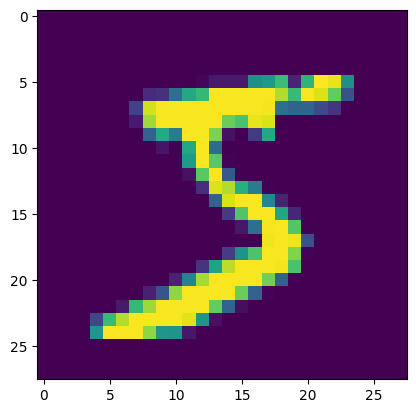

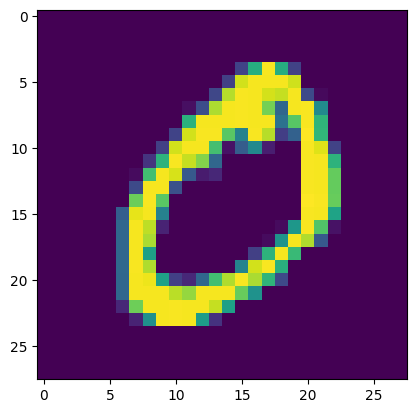

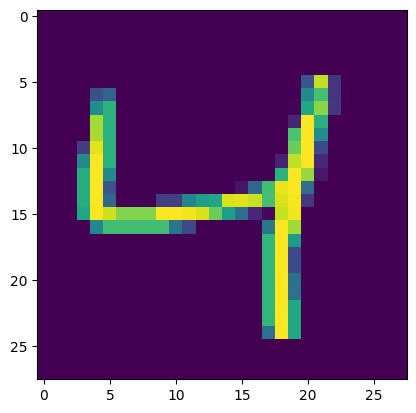

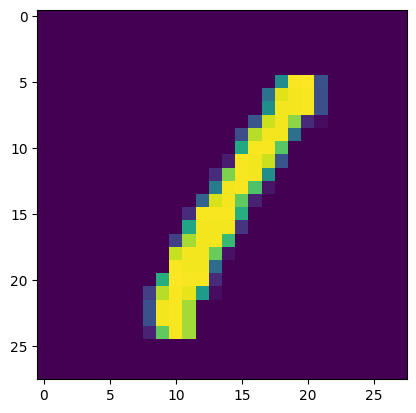

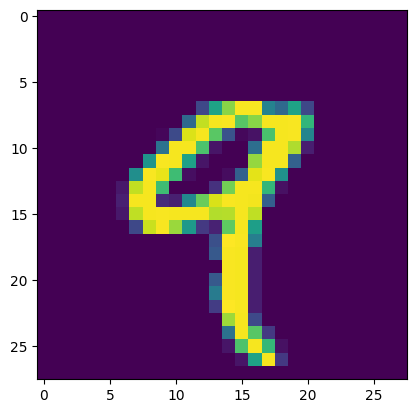

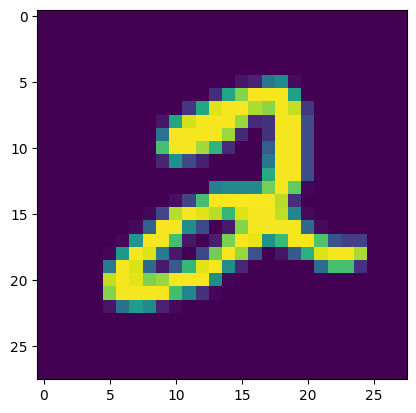

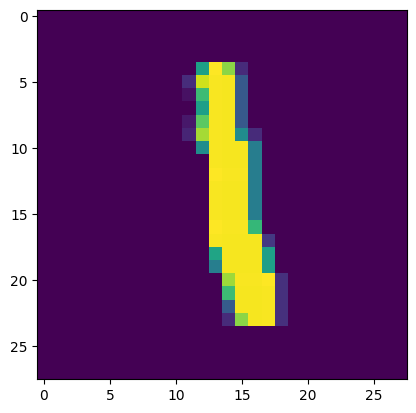

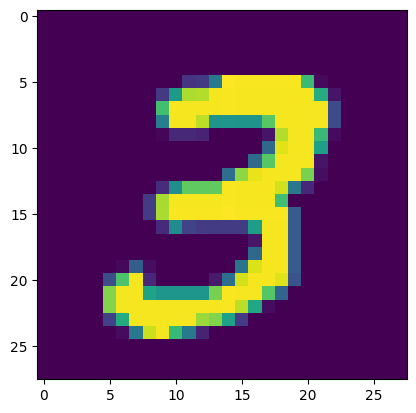

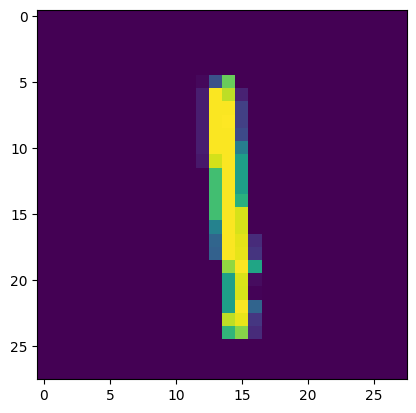

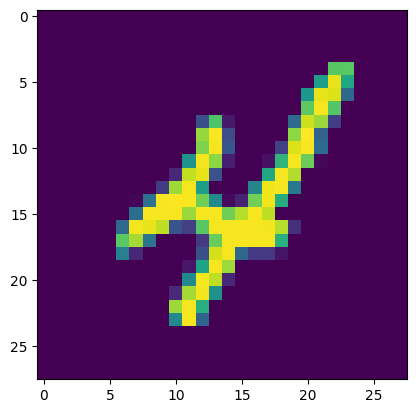

In [ ]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2] * x_train.shape[3])

In [ ]:
x_trainraveled.shape

(60000, 784)

In [ ]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3])

In [ ]:
mlp = keras.Sequential([
    layers.Dense(320, activation = 'sigmoid'),
    layers.Dense(32, activation = 'sigmoid'),
    layers.Dense(32, activation = 'sigmoid'),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
mlp.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = mlp.fit(x_trainraveled, y_train, batch_size = 120, epochs = 10, validation_split = 0.25, verbose = 1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5488 - loss: 1.7903 - val_accuracy: 0.8899 - val_loss: 0.6130
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9026 - loss: 0.5028 - val_accuracy: 0.9253 - val_loss: 0.3077
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9356 - loss: 0.2714 - val_accuracy: 0.9463 - val_loss: 0.2083
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9544 - loss: 0.1838 - val_accuracy: 0.9526 - val_loss: 0.1734
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9623 - loss: 0.1418 - val_accuracy: 0.9579 - val_loss: 0.1517
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.1119 - val_accuracy: 0.9637 - val_loss: 0.1298
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9772 - loss: 0.0886 - val_accuracy: 0.9640 - val_loss: 0.1206
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9806 - loss: 0.0749 - val_accuracy: 0.

In [ ]:
history.history

{'accuracy': [0.7235555648803711,
  0.9111111164093018,
  0.939644455909729,
  0.9544222354888916,
  0.9642444252967834,
  0.9723111391067505,
  0.9770888686180115,
  0.981177806854248,
  0.9849555492401123,
  0.9875777959823608],
 'loss': [1.315088152885437,
  0.4256735146045685,
  0.24791933596134186,
  0.17675328254699707,
  0.13605184853076935,
  0.1076805368065834,
  0.08857199549674988,
  0.07253178209066391,
  0.05988277494907379,
  0.0492875911295414],
 'val_accuracy': [0.8898666501045227,
  0.925266683101654,
  0.9463333487510681,
  0.9526000022888184,
  0.9578666687011719,
  0.9636666774749756,
  0.9639999866485596,
  0.9684000015258789,
  0.9700000286102295,
  0.9706666469573975],
 'val_loss': [0.6130081415176392,
  0.3077182173728943,
  0.2082669734954834,
  0.17338642477989197,
  0.15169109404087067,
  0.12979412078857422,
  0.1205938309431076,
  0.10927534848451614,
  0.10308196395635605,
  0.10174168646335602]}

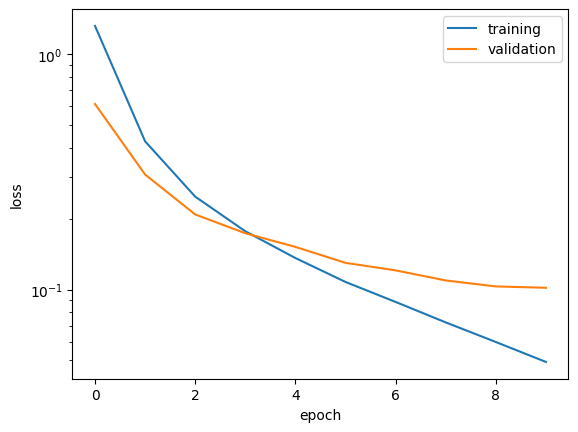

In [ ]:
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.yscale('log')

Figure 1. This image plots the loss function and validation loss in blue and orange respectively. This data is from the MNIST dataset and uses a multilayer perceptron model with sigmoid activation functions as its neural network. The loss function shows how well the model is learning. Here, we can see that it is consistently decreasing showing constant learning about the data it's been given. The validation continually decreases, but at a slower rate, indicating that the model is applying what it has learned to new data well. As it starts to plateau and the loss function continues to learn, implies overfitting.

In [7]:
mlp.evaluate(x_testraveled, y_test)

NameError: name 'mlp' is not defined

In [30]:
model = models.Sequential([
    layers.Conv2D(28, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8493 - loss: 0.4926 - val_accuracy: 0.9770 - val_loss: 0.0714
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9674 - loss: 0.1085 - val_accuracy: 0.9809 - val_loss: 0.0557
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9752 - loss: 0.0828 - val_accuracy: 0.9834 - val_loss: 0.0484
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9802 - loss: 0.0649 - val_accuracy: 0.9842 - val_loss: 0.0435
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9834 - loss: 0.0540 - val_accuracy: 0.9861 - val_loss: 0.0393
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9854 - loss: 0.0481 - val_accuracy: 0.9868 - val_loss: 0.0399
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9867 - loss: 0.0430 - val_accuracy: 0.9862 - val_loss: 0.0387
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9880 - loss: 0.0360 - val_accuracy: 0.

In [23]:
history.history

{'accuracy': [0.9994221925735474,
  0.9991777539253235,
  0.9995111227035522,
  0.998977780342102,
  0.9989333152770996,
  0.9989555478096008,
  0.999822199344635,
  0.9981777667999268,
  0.999666690826416,
  0.9999777674674988],
 'loss': [0.001744285924360156,
  0.0031636999920010567,
  0.001204863772727549,
  0.0035295234993100166,
  0.003561860416084528,
  0.0033569165971130133,
  0.0005410147714428604,
  0.006003101821988821,
  0.0012199083575978875,
  9.674380271462724e-05],
 'val_accuracy': [0.9983333349227905,
  0.9991333484649658,
  0.9989333152770996,
  0.9962666630744934,
  0.9951333403587341,
  0.996999979019165,
  0.9968666434288025,
  0.9972000122070312,
  0.9981333613395691,
  0.9986000061035156],
 'val_loss': [0.004435771610587835,
  0.003091723658144474,
  0.0035596229135990143,
  0.013469906523823738,
  0.018733421340584755,
  0.012149859219789505,
  0.013229815289378166,
  0.012142694555222988,
  0.007388673257082701,
  0.006706278305500746]}

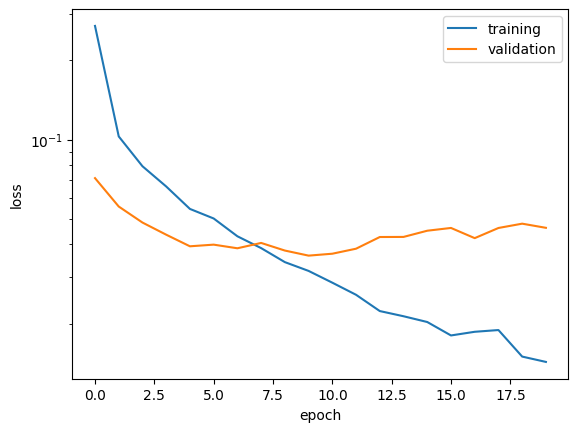

In [33]:
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.yscale('log')

Figure 2. This plot also shows the training and validation loss in blue and orange respectively. The difference here is that the neural network used was a convolutional neural network. It was also plotted over 20 epochs instead of 10 because I've found that it needed more generations to learn effectively. The training loss decreases showing learning, however, it does look to plateau at the end. The validation loss also decreases at first before roughyl pleatuing/increasing slightly. This shows that the model has been effective, but that there is probably overfitting happening.

https://www.geeksforgeeks.org/deep-learning/convolutional-neural-network-cnn-in-tensorflow/

This was a useful source.


In [36]:
model = models.Sequential([
    layers.Conv2D(14, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8282 - loss: 0.5653 - val_accuracy: 0.9701 - val_loss: 0.0993
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9550 - loss: 0.1556 - val_accuracy: 0.9783 - val_loss: 0.0695
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9683 - loss: 0.1058 - val_accuracy: 0.9823 - val_loss: 0.0547
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9750 - loss: 0.0823 - val_accuracy: 0.9825 - val_loss: 0.0502
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9781 - loss: 0.0716 - val_accuracy: 0.9835 - val_loss: 0.0447
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9810 - loss: 0.0593 - val_accuracy: 0.9856 - val_loss: 0.0407
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9834 - loss: 0.0530 - val_accuracy: 0.9865 - val_loss: 0.0412
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9857 - loss: 0.0464 - val_accuracy: 0.

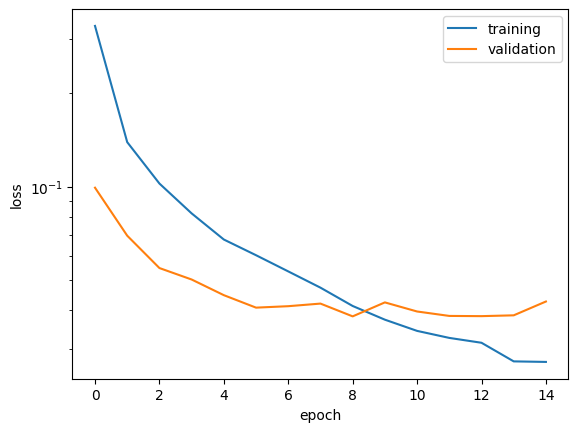

In [37]:
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.yscale('log')

Figure 3. I think this plot is a lot better than the last. I changed the number of epochs as well as the number of filter matrices in the convolution neural network. The plateau looks better here. I think the tail at the end indicates a little bit of overfitting, but it is a lot better than the last.